In [1]:
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
df_train = pd.read_csv('gdrive/My Drive/Colab Notebooks/X_train.csv', encoding='"ISO-8859-1"')
df_test = pd.read_csv('gdrive/My Drive/Colab Notebooks/X_test.csv', encoding='"ISO-8859-1"')

In [5]:
with open("gdrive/My Drive/Colab Notebooks/X_train.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(7000))
    print(result)

{'encoding': 'windows-1251', 'confidence': 0.7048033826626108, 'language': 'Russian'}


In [6]:
df_train = pd.read_csv("gdrive/My Drive/Colab Notebooks/X_train.csv", encoding='windows-1251')

# look at the first few lines
print(df_train.head(5))

   Unnamed: 0  Bad_Flag  x1     x2     x3     x4     x5     x6     x7     x8  \
0         707         0  56  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD   
1        5740         1  21  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD   
2        6646         0  31  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD   
3        6841         0  56  NoDPD  DPD90  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD   
4         842         0  34  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD  NoDPD   

     x10      x11    x12    x13         x14         x15         x16  x17  x18  \
0  Never    Never  Never  Never  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
1  Never    Never  Never  Never  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
2  Never    Never  Never  Never  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
3  Never  More24M  Never  Never  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
4  Never    Never  Never  Never  DPDCurrent  DPDCurrent  DPDCurrent    0    0   

   x19  x20  x21  x22  x23  x24 

In [7]:
df_train.columns = [col.replace(' ', '_') for col in df_train.columns]
df_test.columns = [col.replace(' ', '_') for col in df_test.columns]

In [8]:
df_train.columns

Index(['Unnamed:_0', 'Bad_Flag', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
       'x8',
       ...
       'x267', 'x268', 'x269', 'x270', 'x271', 'x272', 'x273', 'x274', 'x275',
       'x276'],
      dtype='object', length=277)

In [9]:
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [10]:
#df_train.replace(np.NaN,0)
df_train['x255'] = df_train['x255'].fillna(0)
print(df_train['x255'].isnull().sum())
df_train.drop('x255',
  axis='columns', inplace=True)

0


In [11]:
def convert(row):
  try:
    return row.encode('cp1251').decode('utf-8')
  except:
    return row

df_train["x193"] = df_train["x193"].apply(lambda x: convert(x))

In [12]:
print(df_train["x193"])

0       Безсрочен трудов договор
1                        Missing
2       Безсрочен трудов договор
3       Безсрочен трудов договор
4                        Missing
                  ...           
6586    Безсрочен трудов договор
6587    Безсрочен трудов договор
6588                       Друго
6589                Военнослужещ
6590    Безсрочен трудов договор
Name: x193, Length: 6591, dtype: object


In [13]:
print(df_train['x193'].value_counts())

Безсрочен трудов договор       3870
Missing                        1553
Самоосигуряващ се               323
Unemployed                      284
Друго                           269
Безработен на соц. помощи       104
Военнослужещ                    104
Държавен служител                36
Договор за управление            19
Допълнителен трудов договор      18
Съдия/прокурор                   11
Name: x193, dtype: int64


In [14]:
df_train = df_train.replace('Missing', 0)
df_train = df_train.replace('NaN', 0)
print(df_train)

      Unnamed:_0  Bad_Flag  x1     x2     x3     x4      x5     x6     x7  \
0            707         0  56  NoDPD  NoDPD  NoDPD   NoDPD  NoDPD  NoDPD   
1           5740         1  21  NoDPD  NoDPD  NoDPD   NoDPD  NoDPD  NoDPD   
2           6646         0  31  NoDPD  NoDPD  NoDPD   NoDPD  NoDPD  NoDPD   
3           6841         0  56  NoDPD  DPD90  NoDPD   NoDPD  NoDPD  NoDPD   
4            842         0  34  NoDPD  NoDPD  NoDPD   NoDPD  NoDPD  NoDPD   
...          ...       ...  ..    ...    ...    ...     ...    ...    ...   
6586        4668         1  23  NoDPD  NoDPD  NoDPD   DPD90  NoDPD  NoDPD   
6587        7683         1  25  NoDPD  NoDPD  NoDPD   NoDPD  NoDPD  NoDPD   
6588        3809         0  33  NoDPD  NoDPD  NoDPD  DPD181  NoDPD  NoDPD   
6589        1949         0  35  NoDPD  NoDPD  DPD90   DPD90  NoDPD  NoDPD   
6590         934         0  66  NoDPD  NoDPD  NoDPD   NoDPD  NoDPD  NoDPD   

         x8    x10      x11      x12      x13         x14         x15  \
0 

In [15]:
print(df_train.shape)
print(df_test.shape)

(6591, 276)
(2197, 277)


In [ ]:
#df_train = df_train.dropna(thresh=df_train.shape[0]*0.9, how='all', axis='columns')

In [16]:
df_train = df_train.loc[:, (df_train != 0).any(axis=0)]
print(df_train.shape)

(6591, 237)


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Columns: 237 entries, Unnamed:_0 to x276
dtypes: float64(124), int64(86), object(27)
memory usage: 11.9+ MB


In [18]:
unique_counts = pd.DataFrame.from_records([(col, df_train[col].nunique()) for col in df_train.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
                     

In [ ]:
print(unique_counts)

In [19]:
print(df_train['x262'].value_counts())

No     6046
Yes     545
Name: x262, dtype: int64


In [20]:
df_train["x262"] = df_train["x262"].replace({"No":0, "Yes":1})

In [21]:
print(df_train['x262'].value_counts())

0    6046
1     545
Name: x262, dtype: int64


In [22]:
print(df_train.dtypes)

Unnamed:_0      int64
Bad_Flag        int64
x1              int64
x2             object
x3             object
x4             object
x5             object
x6             object
x7             object
x8             object
x10            object
x11            object
x12            object
x13            object
x14            object
x15            object
x16            object
x22           float64
x23           float64
x24           float64
x25           float64
x26           float64
x29           float64
x32           float64
x33           float64
x34           float64
x35           float64
x36           float64
x37           float64
x38           float64
x39           float64
x40           float64
x41           float64
x42           float64
x43           float64
x44           float64
x45           float64
x46           float64
x47             int64
x49           float64
x56             int64
x58             int64
x59             int64
x60             int64
x61           float64
x62       

In [ ]:
# cols_to_exclude = ['x16']
# for col in df_train.columns:
#     if df_train[col].nunique() < 600 and col not in cols_to_exclude:
#         df_train[col] = df_train[col].astype('category')

In [23]:
# Get list of categorical variables
s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x184', 'x193', 'x194', 'x195', 'x253', 'x256', 'x260', 'x261', 'x273', 'x274', 'x275', 'x276']


In [24]:
df_train.value_counts()

Unnamed:_0  Bad_Flag  x1  x2      x3      x4     x5      x6     x7     x8     x10      x11      x12    x13      x14         x15         x16         x22  x23     x24    x25      x26     x29       x32      x33      x34     x35       x36      x37      x38     x39     x40     x41   x42   x43       x44     x45      x46  x47  x49  x56  x58  x59  x60  x61  x62  x63      x64     x65  x66      x67     x68     x69       x70      x71    x72  x73    x74  x75       x76      x77       x78      x79      x80    x81       x82      x83     x84      x85      x86     x87      x88    x89      x90    x91    x92    x93    x94  x95    x96   x97       x98      x99     x100  x101    x102  x103     x104  x105  x106  x107  x111      x114     x115  x116  x117     x118     x119     x120   x122  x123  x124     x125     x126  x127  x128  x129      x132      x135      x136      x137      x138      x139  x140  x141  x142  x143  x144  x145  x146  x147  x148  x149  x150  x151  x152  x153  x154  x155  x156  x157  x158  x1

In [25]:
print(df_train['x7'].value_counts()) 

NoDPD     6588
DPD90        2
DPD181       1
Name: x7, dtype: int64


In [26]:
#3,2,4,5,6,7,8
df_train = df_train.replace('NoDPD', 0)
df_train = df_train.replace('DPD90', 1)
df_train = df_train.replace('DPD181', 2)
df_train = df_train.replace('DPD180', 3)

In [27]:
print(df_train['x260'].value_counts()) 

0               6046
ЛИЧНА            523
НАСЛЕДСТВЕНА      22
Name: x260, dtype: int64


In [28]:
print(df_train['x261'].value_counts()) 

0              6046
СТАЖ            312
ИНВАЛИДНОСТ     233
Name: x261, dtype: int64


In [29]:
print(df_train['x256'].value_counts()) 

0            6046
пожизнено     401
срочна        144
Name: x256, dtype: int64


In [30]:
print(df_train['x253'].value_counts()) 

Yes    4377
No     2214
Name: x253, dtype: int64


In [31]:
df_train["x261"] = df_train["x261"].replace({"СТАЖ":1, "ИНВАЛИДНОСТ":2})
df_train["x256"] = df_train["x256"].replace({"пожизнено":1, "срочна":2})
df_train["x260"] = df_train["x256"].replace({"ЛИЧНА":1, "НАСЛЕДСТВЕНА":2})

In [32]:
#14,15,16
df_train = df_train.replace('DPDCurrent', 1)

In [33]:
df_train["x195"] = df_train["x195"].replace({"No":0, "Yes":1})
df_train["x253"] = df_train["x253"].replace({"No":0, "Yes":1})
df_train["x184"] = df_train["x184"].replace({"Yes":1})
#x273,x274,x275,x276
df_train = df_train.replace('Не', 0)
df_train = df_train.replace('Да', 1)

In [34]:
df_train = df_train.replace('Never', 0)
df_train = df_train.replace('More24M', 1)
df_train = df_train.replace('Less24M', 3)

In [35]:
df_train.value_counts()

Unnamed:_0  Bad_Flag  x1  x2  x3  x4  x5  x6  x7  x8  x10  x11  x12  x13  x14  x15  x16  x22  x23     x24    x25      x26     x29       x32      x33      x34     x35       x36      x37      x38     x39     x40     x41   x42   x43       x44     x45      x46  x47  x49  x56  x58  x59  x60  x61  x62  x63      x64     x65  x66      x67     x68     x69       x70      x71    x72  x73    x74  x75       x76      x77       x78      x79      x80    x81       x82      x83     x84      x85      x86     x87      x88    x89      x90    x91    x92    x93    x94  x95    x96   x97       x98      x99     x100  x101    x102  x103     x104  x105  x106  x107  x111      x114     x115  x116  x117     x118     x119     x120   x122  x123  x124     x125     x126  x127  x128  x129      x132      x135      x136      x137      x138      x139  x140  x141  x142  x143  x144  x145  x146  x147  x148  x149  x150  x151  x152  x153  x154  x155  x156  x157  x158  x159  x160  x161  x171  x173  x175  x177  x178      x179  x18

In [36]:
print(df_train['x193'].value_counts()) 

Безсрочен трудов договор       3870
0                              1553
Самоосигуряващ се               323
Unemployed                      284
Друго                           269
Безработен на соц. помощи       104
Военнослужещ                    104
Държавен служител                36
Договор за управление            19
Допълнителен трудов договор      18
Съдия/прокурор                   11
Name: x193, dtype: int64


In [37]:
df_train["x193"] = df_train["x193"].replace({"Безсрочен трудов договор":1, "Самоосигуряващ се":2, "Unemployed":3, "Друго": 4, "Безработен на соц. помощи":5, "Военнослужещ":6, "Държавен служител":7, "Договор за управление":8, "Допълнителен трудов договор":9, "Съдия/прокурор":10,})

In [38]:
print(df_train['x193'].value_counts()) 

1     3870
0     1553
2      323
3      284
4      269
5      104
6      104
7       36
8       19
9       18
10      11
Name: x193, dtype: int64


In [39]:
df_train.dtypes

Unnamed:_0      int64
Bad_Flag        int64
x1              int64
x2              int64
x3              int64
x4              int64
x5              int64
x6              int64
x7              int64
x8              int64
x10             int64
x11             int64
x12             int64
x13             int64
x14             int64
x15             int64
x16             int64
x22           float64
x23           float64
x24           float64
x25           float64
x26           float64
x29           float64
x32           float64
x33           float64
x34           float64
x35           float64
x36           float64
x37           float64
x38           float64
x39           float64
x40           float64
x41           float64
x42           float64
x43           float64
x44           float64
x45           float64
x46           float64
x47             int64
x49           float64
x56             int64
x58             int64
x59             int64
x60             int64
x61           float64
x62       

In [40]:
df_train = pd.DataFrame(df_train)
df_train

,Unnamed:_0,Bad_Flag,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x22,x23,x24,x25,x26,x29,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x49,x56,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x111,x114,x115,x116,x117,x118,x119,x120,x122,x123,x124,x125,x126,x127,x128,x129,x132,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x171,x173,x175,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276
0,707,0,56,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,2428.33,0.00,963.02,0.00,1728.33,0.00,963.02,0.00,1728.33,0.00,167.61,0.00,0.0,0.00,2272.24,0.00,0.0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0.00,0.0,0.00,167.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,260.83,0.00,700.22,0.00,963.02,0.00,702.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,963.02,0.00,700.0,0,0.00,0.0,543.91,0.0,0.0,0,0.00,1663.24,0.00,0,0.0,963.02,0.00,700.22,0.00,0.0,0.0,963.02,0.00,0,0,0,0.000000,1.000000,0.000000,0.000000,0.557197,0.000000,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0.000000,0.000000,0.0,1,20.80,2012.6800,2001.600,5,20.80,2012.6800,2001.600,5,1,01,1,1,1,807.877778,799.00,72332009,4910,0.000000,0.0,0.0,1.000000,7,364,72,364,4,364,49,364,1,1,812.316667,799.00,72332009,4910,0.0,0.0,0.0,1.0,7,183,72,183,4,183,49,183,1,1,807.877778,799.00,72332009,4910,0.0,0.0,0.0,1.0,7,91,72,91,4,91,49,91,133,377,3,1,0.00,0,0.00,0.00,0,0,0,0,2428.33,0.00,2428.33,963.02,0.00,963.02,0.00,0.00,0.00,0.00,0,1,0,1
1,5740,1,21,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.00,2300.00,0.00,1277.27,0.00,800.00,0.00,777.27,0.00,800.00,0.00,169.23,0.0,0.00,0.00,1800.00,0.0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0.00,0.0,0.00,0.00,169.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,856.27,0.00,1277.27,0.00,1277.27,0.0,1500.0,0.0,500.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1152.68,0.0,0,0.00,0.0,0.00,0.0,0.0,0,0.00,0.00,2133.54,0,0.0,0.00,1277.27,0.00,856.27,0.0,0.0,0.00,1152.68,0,0,0,1.000000,0.000000,1.000000,1.000000,0.000000,0.971588,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,5,0.000000,0.000000,0.0,1,0.00,0.0000,0.000,0,0.00,0.0000,0.000,0,0,0,0,0,0,0.000000,0.00,0,0,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0.000000,0.00,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0.00,0.00,0,0,0,0,0.00,2300.00,2300.00,0.00,1277.27,1277.27,777.27,0.00,0.00,0.00,1,0,0,0
2,6646,0,31,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,8500.00,29469.17,8220.00,27234.56,7000.00,29469.17,6826.00,27234.56,7000.00,29469.32,104.49,497.93,0.0,122.11,8473.00,29469.32,0.0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0.00,0.0,0.00,134.49,497.93,7742.00,27234.56,0.00,0.00,35.36,122.11,7612.14,26905.12,8220.00,27234.56,22.00,0.00,8220.00,27234.56,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.36,122.11,8075.14,26905.12,1500.0,0,1394.00,0.0,1473.00,0.0,30.0,0,50.36,8242.00,27234.56,0,0.0,478.00,0.00,22.00,0.00,15.0,0.0,463.00,0.00,0,0,0,0.776134,0.231846,0.768154,0.768154,0.975143,0.924167,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.787341,2,1,0.004865,0.929333,0.0,1,20.75,1320.4725,1321.535,4,20.75,1320.4725,1321.535,4,1,01,1,1,1,557.638889,550.00,83222006,4639,0.000000,0.0,0.0,1.000000,8,365,83,365,4,365,46,365,1,1,553.055556,550.00,83222006,4639,0.0,0.0,0.0,1.0,8,181,83,181,4,181,46,181,1,1,550.000000,550.00,83222

In [41]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed:_0,6591.0,4.404311e+03,2.523372e+03,0.0,2210.500000,4453.000000,6.584500e+03,8.787000e+03
Bad_Flag,6591.0,1.137915e-01,3.175820e-01,0.0,0.000000,0.000000,0.000000e+00,1.000000e+00
x1,6591.0,4.125292e+01,1.273766e+01,20.0,31.000000,40.000000,5.000000e+01,1.200000e+02
x2,6591.0,2.212107e-01,5.907063e-01,0.0,0.000000,0.000000,0.000000e+00,3.000000e+00
x3,6591.0,4.481869e-01,8.318449e-01,0.0,0.000000,0.000000,1.000000e+00,3.000000e+00
x4,6591.0,4.020634e-02,2.318839e-01,0.0,0.000000,0.000000,0.000000e+00,3.000000e+00
x5,6591.0,5.193446e-01,8.681940e-01,0.0,0.000000,0.000000,1.000000e+00,3.000000e+00
x6,6591.0,4.551661e-04,2.133139e-02,0.0,0.000000,0.000000,0.000000e+00,1.000000e+00
x7,6591.0,6.068882e-04,3.016790e-02,0.0,0.000000,0.000000,0.000000e+00,2.000000e+00
x8,6591.0,7.586102e-04,2.753452e-02,0.0,0.000000,0.000000,0.000000e+00,1.000000e+00


In [42]:
df_train.median() 

Unnamed:_0    4453.000000
Bad_Flag         0.000000
x1              40.000000
x2               0.000000
x3               0.000000
x4               0.000000
x5               0.000000
x6               0.000000
x7               0.000000
x8               0.000000
x10              0.000000
x11              0.000000
x12              0.000000
x13              0.000000
x14              1.000000
x15              1.000000
x16              1.000000
x22              0.000000
x23              0.000000
x24              0.000000
x25           4401.000000
x26            500.000000
x29           2988.000000
x32            361.000000
x33           2524.000000
x34            291.990000
x35           1622.000000
x36            200.000000
x37           2500.000000
x38            260.000000
x39             99.000000
x40              0.000000
x41              0.000000
x42              0.000000
x43           4209.460000
x44            500.000000
x45              0.000000
x46              0.000000
x47         

In [43]:
df_train.describe().T['mean']

Unnamed:_0    4.404311e+03
Bad_Flag      1.137915e-01
x1            4.125292e+01
x2            2.212107e-01
x3            4.481869e-01
x4            4.020634e-02
x5            5.193446e-01
x6            4.551661e-04
x7            6.068882e-04
x8            7.586102e-04
x10           1.577909e-01
x11           2.717342e-01
x12           3.626157e-02
x13           3.069337e-01
x14           1.000000e+00
x15           1.000000e+00
x16           1.000000e+00
x22           3.484219e+02
x23           3.161277e+02
x24           2.411713e+02
x25           1.511047e+04
x26           2.957544e+03
x29           1.275512e+04
x32           2.496586e+03
x33           1.010771e+04
x34           2.281831e+03
x35           8.599540e+03
x36           2.118257e+03
x37           9.988095e+03
x38           2.278902e+03
x39           1.761888e+02
x40           1.350634e+02
x41           1.821339e+01
x42           1.149536e+01
x43           1.479848e+04
x44           2.739908e+03
x45           1.895511e+02
x

In [44]:
df_train.corr()

,Unnamed:_0,Bad_Flag,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x22,x23,x24,x25,x26,x29,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x49,x56,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x111,x114,x115,x116,x117,x118,x119,x120,x122,x123,x124,x125,x126,x127,x128,x129,x132,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x171,x173,x175,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276
Unnamed:_0,1.000000,0.009453,-0.004527,-0.024922,0.012344,-0.004218,-0.013820,-0.024478,-0.023014,-0.020769,-0.029700,0.003741,-0.011536,-0.005400,NaN,NaN,NaN,-0.006048,-0.007538,-0.004800,0.007779,-0.012501,0.004564,-0.015384,-0.012051,-0.010917,-0.011789,-0.012579,-0.012522,-0.010853,-0.005682,-0.014069,-0.011686,-0.008146,0.006620,-0.012029,-0.006542,0.006840,-0.027788,-0.024838,-0.011802,0.003227,-0.027788,-0.011802,-0.024838,0.003227,-0.008603,0.000472,0.006840,-0.014880,0.003788,-0.010842,0.004508,-0.015851,-0.010377,0.007706,0.013926,-0.009285,0.004074,-0.010570,0.004718,-0.015692,-0.000854,-0.012778,0.004564,-0.015384,-0.003645,-0.002700,0.019791,-0.007351,0.016572,-0.010120,0.018621,-0.005603,0.020692,0.002114,0.013168,-0.009324,0.010913,-0.010889,0.004210,-0.010784,-0.005657,-0.003926,-0.003628,0.004572,0.000859,-0.005571,-0.016022,0.012491,-0.011563,-0.000544,-0.014578,0.002078,-0.005261,0.001807,-0.002219,0.002700,-0.026816,-0.017201,-0.008209,0.002801,-0.003467,-0.006707,0.001011,0.000352,0.001702,-0.002916,0.002241,0.002241,-0.000176,-0.006647,-0.005014,-0.010084,-0.016870,-0.000215,-0.006311,0.001717,-0.012228,0.004500,0.002408,-0.005568,-0.021912,-0.021044,-0.002726,-0.006565,-0.009795,-0.024478,-0.023168,-0.023016,0.008718,-0.024478,-0.023168,-0.020769,0.008718,-0.011802,0.004553,-0.011802,0.006637,-0.004245,-0.010980,-0.010501,-0.005631,-0.002242,-0.013969,NaN,-0.008284,-0.009297,-0.009361,-0.000398,-0.005643,-0.007694,-0.007559,0.002009,-0.004663,-0.008173,-0.001442,0.006009,-0.014216,-0.009560,-0.017464,0.003357,0.006791,0.002696,-0.009218,-0.002026,-0.016719,-0.004665,-0.016681,-0.004995,0.009516,-0.007278,0.009164,-0.007165,0.005726,0.008337,-0.010341,-0.004625,-0.015995,0.004533,0.009779,0.007722,-0.009371,-0.004165,-0.011134,-0.001635,-0.010973,-0.001903,0.015421,-0.002945,0.015204,-0.001609,-0.001073,-0.001090,-0.017532,-0.008764,-0.014084,0.007403,0.013164,0.007822,-0.008569,-0.004341,-0.011237,-0.006931,-0.011617,-0.006384,0.015353,-0.008805,0.014381,-0.008153,0.008789,0.000892,-0.020599,0.002304,0.004767,-0.003067,0.003019,0.004179,-0.012011,-0.003067,-0.005222,-0.001289,0.007779,-0.012501,0.004910,0.004564,-0.015384,0.000826,-0.012579,0.010913,0.012264,0.011626,-0.014134,-0.003863,-0.013144,-0.013982
Bad_Flag,0.009453,1.000000,-0.135782,-0.020148,-0.047182,0.042953,0.079521,0.014753,-0.007209,0.007480,-0.016013,-0.065921,0.042801,0.077857,NaN,NaN,NaN,0.008694,0.080065,0.076075,-0.048327,0.010372,-0.039157,0.015443,-0.035249,0.009790,-0.024511,0.021550,-0.035024,0.009841,-0.069582,0.076466,-0.018102,0.062668,-0.047400,0.006075,0.033930,0.010034,0.026993,0.029140,-0.004414,0.009471,0.026993,-0.004414,0.029140,0.009471,0.018496,-0.007292,0.010034,0.035961,-0.072030,0.078953,-0.035562,-0.003547,-0.017398,0.029173,0.033024,0.024733,-0.036480,-0.007892,-0.038539,-0.002972,-0.016253,0.048520,-0.039157,0.015443,-0.022959,0.07

In [45]:
c = df_train.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

x119  x86     0.000001
x86   x119    0.000001
x42   x75     0.000002
x75   x42     0.000002
x63   x59     0.000009
                ...   
x275  x184         NaN
x276  x14          NaN
      x15          NaN
      x16          NaN
      x184         NaN
Length: 55696, dtype: float64


In [46]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, 0].values

Split the data between the Training Data and Test Data

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2
                                                    ,random_state = 0)

In [48]:
print(X_train, Y_train, X, y)

[[7419 0 42 ... 0 1 0]
 [7891 0 29 ... 0 0 0]
 [2536 0 71 ... 1 1 0]
 ...
 [7025 0 46 ... 1 1 0]
 [6211 0 29 ... 0 1 0]
 [4487 0 23 ... 1 0 0]] [7419 7891 2536 ... 7025 6211 4487] [[707 0 56 ... 0 1 0]
 [5740 1 21 ... 1 0 0]
 [6646 0 31 ... 1 1 0]
 ...
 [3809 0 33 ... 1 0 0]
 [1949 0 35 ... 0 1 0]
 [934 0 66 ... 1 1 0]] [ 707 5740 6646 ... 3809 1949  934]


Feature Scaling

In [49]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
print (X_test_std,X_train_std)

[[-0.7386531  -0.35802679  1.23800268 ... -1.08393611  0.75714048
  -0.25631305]
 [ 0.07542235  2.7930871  -1.51796024 ...  0.9225636   0.75714048
   3.90147901]
 [ 1.06602028 -0.35802679 -0.80928406 ... -1.08393611  0.75714048
  -0.25631305]
 ...
 [-1.16143041 -0.35802679 -0.33683327 ...  0.9225636  -1.32075886
  -0.25631305]
 [-1.44314913 -0.35802679 -0.88802586 ... -1.08393611  0.75714048
  -0.25631305]
 [ 0.20412836 -0.35802679 -0.49431687 ...  0.9225636   0.75714048
  -0.25631305]] [[ 1.2026957  -0.35802679  0.05687571 ... -1.08393611  0.75714048
  -0.25631305]
 [ 1.39077382 -0.35802679 -0.96676766 ... -1.08393611 -1.32075886
  -0.25631305]
 [-0.74303627 -0.35802679  2.34038785 ...  0.9225636   0.75714048
  -0.25631305]
 ...
 [ 1.04569828 -0.35802679  0.3718429  ...  0.9225636   0.75714048
  -0.25631305]
 [ 0.72134321 -0.35802679 -0.96676766 ... -1.08393611  0.75714048
  -0.25631305]
 [ 0.03437988 -0.35802679 -1.43921844 ...  0.9225636  -1.32075886
  -0.25631305]]


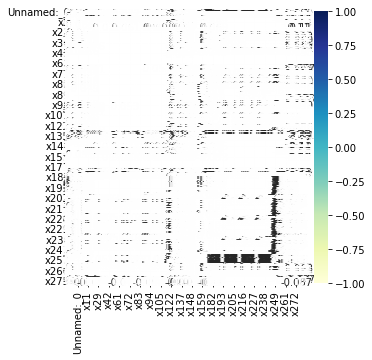

In [51]:
corr = df_train.corr()
plt.figure(figsize = (5,5))

sns.heatmap(round(corr, 3), annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

PCA

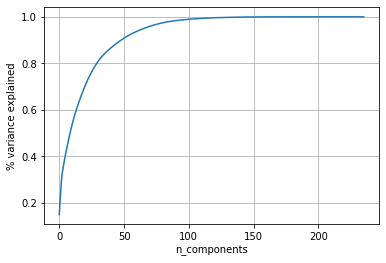

In [52]:
pca = PCA(n_components = X_train_std.shape[1])
pca_data = pca.fit_transform(X_train_std)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [53]:
cumm_var_explained

array([0.14945495, 0.24369461, 0.31828214, 0.35226008, 0.38430705,
       0.41322747, 0.44149511, 0.46809313, 0.49298574, 0.51682867,
       0.53889237, 0.56049984, 0.58037593, 0.59823152, 0.61503455,
       0.63135371, 0.64716812, 0.66216482, 0.67673969, 0.69109185,
       0.70434503, 0.7173451 , 0.72994247, 0.74165724, 0.75292981,
       0.76330244, 0.77326732, 0.78301586, 0.79227725, 0.80102434,
       0.80903699, 0.81646518, 0.82360281, 0.83003088, 0.83590689,
       0.84171896, 0.84734824, 0.85261583, 0.8578246 , 0.86286455,
       0.86751303, 0.87201671, 0.87638942, 0.8807587 , 0.88500274,
       0.88912946, 0.89319117, 0.89713018, 0.90098248, 0.90469555,
       0.90832623, 0.91182485, 0.91523667, 0.91851764, 0.92165023,
       0.92467853, 0.92753526, 0.9302704 , 0.93290683, 0.93549553,
       0.93797406, 0.94043066, 0.94280368, 0.9451387 , 0.94740572,
       0.9495964 , 0.95171412, 0.95375606, 0.95569   , 0.95758893,
       0.95945554, 0.96121617, 0.96293574, 0.96463459, 0.96624

In [54]:
pca.explained_variance_

array([3.43811597e+01, 2.16792331e+01, 1.71583885e+01, 7.81640851e+00,
       7.37220018e+00, 6.65295869e+00, 6.50279085e+00, 6.11870560e+00,
       5.72638558e+00, 5.48491440e+00, 5.07561350e+00, 4.97066138e+00,
       4.57236950e+00, 4.10756486e+00, 3.86542802e+00, 3.75412072e+00,
       3.63800297e+00, 3.44989528e+00, 3.35285754e+00, 3.30162266e+00,
       3.04880881e+00, 2.99058452e+00, 2.89794460e+00, 2.69490876e+00,
       2.59318182e+00, 2.38615802e+00, 2.29235680e+00, 2.24258942e+00,
       2.13052511e+00, 2.01221238e+00, 1.84325854e+00, 1.70880632e+00,
       1.64196724e+00, 1.47873684e+00, 1.35173818e+00, 1.33703062e+00,
       1.29497916e+00, 1.21177552e+00, 1.19824532e+00, 1.15940834e+00,
       1.06935323e+00, 1.03604338e+00, 1.00591263e+00, 1.00512541e+00,
       9.76314646e-01, 9.49324912e-01, 9.34370652e-01, 9.06144448e-01,
       8.86198618e-01, 8.54166735e-01, 8.35216089e-01, 8.04834316e-01,
       7.84866730e-01, 7.54767947e-01, 7.20631981e-01, 6.96641234e-01,
      

In [55]:
sum(pca.explained_variance_ratio_)

1.0000000000000002

In [56]:
pca = PCA(n_components=6)
pca_train_data = pca.fit_transform(X_train_std)
pca_test_data = pca.transform(X_test_std)

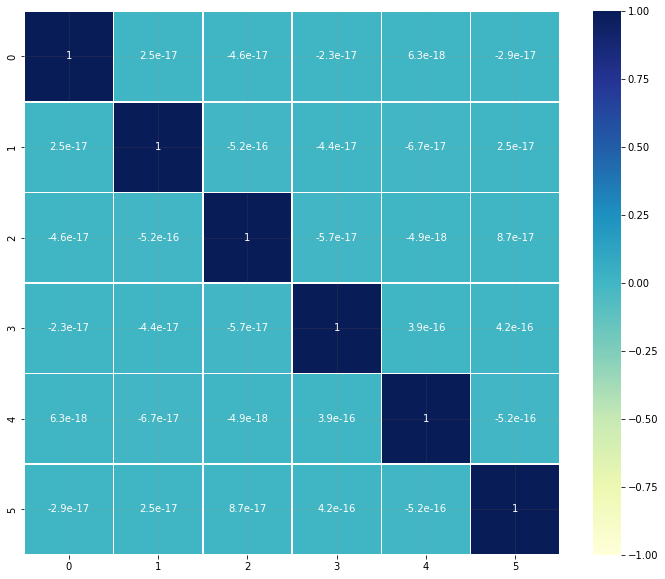

In [57]:
df_train_pca = pd.DataFrame(pca_train_data)
df_test_pca = Y_train

corr = df_train_pca.corr()
plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

VIF

In [58]:
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [59]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df_train.iloc[:,:-1]
calc_vif(X)

5

In [60]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, 0].values

In [61]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

In [62]:
model = LinearRegression().fit(X_train,y_train)
print(model.score(X_train,y_train),
model.score(X_test,y_test))

1.0 1.0


In [63]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=90)

In [ ]:
model.score(X_train,)